# KNN Model

In [12]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [13]:
# Read the data file into a Pandas DataFrame
df = pd.read_csv('/Users/blankajarmoszko/PycharmProjects/thesis/data/df_cleaned.csv')

In [14]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


Number of rows per star rating:
sentiment
2    17996
1    14874
0    13876
Name: count, dtype: int64


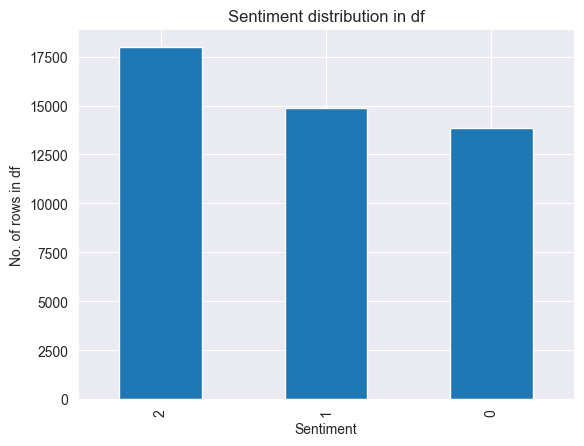

In [15]:
# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 3:
        return 0
    elif stars_received <= 4:
        return 1
    else:
        return 2
# Mapping stars to sentiment into three categories
df['sentiment'] = [ map_sentiment(x) for x in df['star_rating']]
print("Number of rows per star rating:")
print(df['sentiment'].value_counts())

# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [16]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


In [17]:
# Drop rows with NaN values in the 'cleaned_text' column
df = df.dropna(subset=['cleaned_text'])

# Reset index after removing rows
df.reset_index(drop=True, inplace=True)

In [18]:
# Split the dataset into training and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(df['cleaned_text'], df['sentiment'], test_size=0.2, random_state=42)


In [19]:
df.head()

,title,reviewer_name,num_reviews,num_followers,star_rating,review_text,num_likes,num_comments,sentiment,cleaned_text
0,The Stolen Heir,Emily May,"2,031",310k,4.0,Not quite The Cruel Prince but I enjoyed this ...,"1,206",3.0,1,"quit,cruel,princ,enjoy,loti,love,back,world,lo..."
1,The Stolen Heir,jessica,"2,563",42.2k,4.0,hmm. i didnt obsess over this one like i did w...,654,0.0,1,"hmm,didnt,obsess,one,like,origin,trilogywhil,e..."
2,The Stolen Heir,katia,306,526,3.0,"3.5 ★oak was a disappointment, but suren!! i l...","1,233",0.0,0,"oak,disappoint,suren,love,much,cant,pretend,do..."
3,The Stolen Heir,madeline,111,18,3.0,Every single mention of Oak’s hooves was a jum...,"1,707",4.0,0,"everi,singl,mention,oak,hoov,jumpscar"
4,The Stolen Heir,Haley pham,81,143k,4.0,4.5 stars star fairy_light_skin_tone face_h...,"1,432",0.0,1,"star,star,fairy_light_skin_ton,face_holding_ba..."


In [20]:
# Vectorize the text using TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(train_data)
X_test_tfidf = vectorizer.transform(test_data)

## Naive Bayes 

### Naive Bayes with tfidf

In [21]:
# Train a Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, train_labels)

# Make predictions on the test set
test_predictions = naive_bayes_model.predict(X_test_tfidf)
# Evaluate the model
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(test_labels, test_predictions))

# Make predictions on the train set
train_predictions = naive_bayes_model.predict(X_train_tfidf)
# Evaluate the model
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train Accuracy: {train_accuracy}")
print(classification_report(train_labels, train_predictions))

Test Accuracy: 0.5040249007191155
              precision    recall  f1-score   support

           0       0.86      0.36      0.51      2767
           1       0.49      0.08      0.14      2941
           2       0.45      0.96      0.61      3609

    accuracy                           0.50      9317
   macro avg       0.60      0.47      0.42      9317
weighted avg       0.58      0.50      0.43      9317

Train Accuracy: 0.5835837716003005
              precision    recall  f1-score   support

           0       0.92      0.48      0.63     11034
           1       0.80      0.20      0.32     11868
           2       0.49      0.98      0.66     14366

    accuracy                           0.58     37268
   macro avg       0.74      0.55      0.54     37268
weighted avg       0.72      0.58      0.54     37268


## Logistic Regression

### Logistic Regression w/ tfidf

In [22]:
# Train a Logistic Regression classifier
logistic_regression_model= LogisticRegression()
logistic_regression_model.fit(X_train_tfidf, train_labels)

# Make predictions on the test set
test_predictions = logistic_regression_model.predict(X_test_tfidf)
# Evaluate the model
test_accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(test_labels, test_predictions))

# Make predictions on the train set
train_predictions = logistic_regression_model.predict(X_train_tfidf)
# Evaluate the model
train_accuracy = accuracy_score(train_labels, train_predictions)
print(f"Train Accuracy: {train_accuracy}")
print(classification_report(train_labels, train_predictions))

Test Accuracy: 0.6389395728238704
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      2767
           1       0.53      0.48      0.50      2941
           2       0.65      0.72      0.68      3609

    accuracy                           0.64      9317
   macro avg       0.64      0.63      0.63      9317
weighted avg       0.64      0.64      0.64      9317

Train Accuracy: 0.8043093270365997
              precision    recall  f1-score   support

           0       0.86      0.83      0.84     11034
           1       0.77      0.71      0.74     11868
           2       0.79      0.87      0.83     14366

    accuracy                           0.80     37268
   macro avg       0.81      0.80      0.80     37268
weighted avg       0.80      0.80      0.80     37268


## Random Forest

### Random Forrest witb tfidf

In [24]:
from sklearn.ensemble import RandomForestClassifier
# Build the Random Forest model
# Best Parameters: {'n_estimators': 75, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}
random_forest_model = RandomForestClassifier(n_estimators=75, min_samples_split=10, min_samples_leaf= 4, max_features= 'sqrt', max_depth= None, random_state=42)

# Train the model
random_forest_model.fit(X_train_tfidf, train_labels)

# Make predictions on the train set
test_predictions = random_forest_model.predict(X_test_tfidf)
# Evaluate the model on the test set
test_accuracy = accuracy_score(test_labels, test_predictions)
print("\nTest Set:")
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(test_labels, test_predictions))

# Make predictions on the train set
train_predictions = random_forest_model.predict(X_train_tfidf)

# Evaluate the model on the train set
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Train Set:")
print(f"Train Accuracy: {train_accuracy}")
print(classification_report(train_labels, train_predictions))


Test Set:
Test Accuracy: 0.5876355049908769
              precision    recall  f1-score   support

           0       0.73      0.61      0.66      2767
           1       0.54      0.22      0.31      2941
           2       0.54      0.87      0.67      3609

    accuracy                           0.59      9317
   macro avg       0.60      0.57      0.55      9317
weighted avg       0.60      0.59      0.55      9317
Train Set:
Train Accuracy: 0.8317591499409681
              precision    recall  f1-score   support

           0       0.92      0.81      0.86     11034
           1       0.94      0.67      0.78     11868
           2       0.74      0.98      0.84     14366

    accuracy                           0.83     37268
   macro avg       0.87      0.82      0.83     37268
weighted avg       0.86      0.83      0.83     37268


### AdaBoost Model

In [25]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
# Define a shallow decision tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=3)

# Reduce the number of estimators to make training faster
ada_classifier = AdaBoostClassifier( base_estimator, n_estimators=50, learning_rate= 0.5)

# Fit the classifier
ada_classifier.fit(X_train_tfidf, train_labels)

# Predictions on training set
train_preds = ada_classifier.predict(X_train_tfidf)

# Predictions on test set
test_preds = ada_classifier.predict(X_test_tfidf)

# Classification report and confusion matrix for training set
print("Training Set:")
print("Classification Report:")
print(classification_report(train_labels, train_preds))
print("Confusion Matrix:")
print(confusion_matrix(train_labels, train_preds))

# Classification report and confusion matrix for test set
print("\nTest Set:")
print("Classification Report:")
print(classification_report(test_labels, test_preds))
print("Confusion Matrix:")
print(confusion_matrix(test_labels, test_preds))

Training Set:
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.62      0.68     11034
           1       0.51      0.41      0.45     11868
           2       0.59      0.77      0.67     14366

    accuracy                           0.61     37268
   macro avg       0.62      0.60      0.60     37268
weighted avg       0.62      0.61      0.60     37268

Confusion Matrix:
[[ 6847  2042  2145]
 [ 1478  4842  5548]
 [  645  2629 11092]]

Test Set:
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.59      0.64      2767
           1       0.48      0.38      0.42      2941
           2       0.58      0.76      0.66      3609

    accuracy                           0.59      9317
   macro avg       0.59      0.57      0.57      9317
weighted avg       0.59      0.59      0.58      9317

Confusion Matrix:
[[1621  554  592]
 [ 468 1117 1356]
 [ 207  662 2740]]


### KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier with default parameters
knn_classifier = KNeighborsClassifier()

# Fit the KNN classifier to the training data
knn_classifier.fit(X_train_tfidf, train_labels)

# Predictions on training set
train_preds = knn_classifier.predict(X_train_tfidf)

# Predictions on test set
test_preds = knn_classifier.predict(X_test_tfidf)

# Classification report and confusion matrix for training set
print("Training Set:")
print("Classification Report:")
print(classification_report(train_labels, train_preds))
print("Confusion Matrix:")
print(confusion_matrix(train_labels, train_preds))

# Classification report and confusion matrix for test set
print("\nTest Set:")
print("Classification Report:")
print(classification_report(test_labels, test_preds))
print("Confusion Matrix:")
print(confusion_matrix(test_labels, test_preds))

Training Set:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.69      0.66     11034
           1       0.58      0.59      0.59     11868
           2       0.71      0.65      0.68     14366

    accuracy                           0.64     37268
   macro avg       0.64      0.64      0.64     37268
weighted avg       0.65      0.64      0.64     37268

Confusion Matrix:
[[7610 1974 1450]
 [2393 7016 2459]
 [1991 3028 9347]]

Test Set:
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.52      0.50      2767
           1       0.38      0.40      0.39      2941
           2       0.52      0.48      0.50      3609

    accuracy                           0.46      9317
   macro avg       0.46      0.46      0.46      9317
weighted avg       0.47      0.46      0.46      9317

Confusion Matrix:
[[1427  749  591]
 [ 798 1177  966]
 [ 760 1132 1717]]


# Build Ensamble Model

### Voting Model

In [27]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

# Assuming you have already trained your base models (e.g., logistic regression, random forest, etc.)
# Replace base_model1, base_model2, ... with your actual trained models

# Define a list of tuples containing the name and the trained base model
# Example: [('model1', base_model1), ('model2', base_model2), ...]
models = [('Logistic Regression', logistic_regression_model),
          ('Random Forest', random_forest_model),
          ('AdaBoost', ada_classifier),
          ('KNN', knn_classifier)]

# Create the voting classifier
voting_classifier = VotingClassifier(estimators=models, voting='hard')  # or 'soft' for soft voting

# Evaluate the voting classifier using cross-validation
scores = cross_val_score(voting_classifier, X_train_tfidf, train_labels, cv=5)

# Print the mean cross-validation accuracy
print("Mean Cross-Validation Accuracy:", scores.mean())

Mean Cross-Validation Accuracy: 0.6169903724731508


In [28]:
# Train the voting classifier on the entire training dataset
voting_classifier.fit(X_train_tfidf, train_labels)

# Use the trained classifier to make predictions on the test data
test_predictions = voting_classifier.predict(X_test_tfidf)

# Evaluate performance using accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Evaluate performance using classification report (which includes precision, recall, F1-score, and support)
print("Classification Report:")
print(classification_report(test_labels, test_predictions))


Test Accuracy: 0.6291724804121498
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.71      0.71      2767
           1       0.53      0.42      0.47      2941
           2       0.63      0.73      0.68      3609

    accuracy                           0.63      9317
   macro avg       0.62      0.62      0.62      9317
weighted avg       0.62      0.63      0.62      9317


In [31]:
# Train the voting classifier on the entire training dataset
voting_classifier.fit(X_train_tfidf, train_labels)

# Use the trained classifier to make predictions on the test data
train_predictions = voting_classifier.predict(X_test_tfidf)

# Evaluate performance using accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Train Accuracy:", train_accuracy)

# Evaluate performance using classification report (which includes precision, recall, F1-score, and support)
print("Classification Report:")
print(classification_report(train_labels, train_predictions))

ValueError: Found input variables with inconsistent numbers of samples: [37268, 9317]

In [32]:
# Create the voting classifier
voting_classifier_soft = VotingClassifier(estimators=models, voting='soft')  # or 'soft' for soft voting

# Evaluate the voting classifier using cross-validation
scores = cross_val_score(voting_classifier_soft, X_train_tfidf, train_labels, cv=5)

# Print the mean cross-validation accuracy
print("Mean Cross-Validation Accuracy:", scores.mean())

Mean Cross-Validation Accuracy: 0.5978320343304402


In [33]:
# Train the voting classifier on the entire training dataset
voting_classifier_soft.fit(X_train_tfidf, train_labels)

# Use the trained classifier to make predictions on the test data
test_predictions = voting_classifier_soft.predict(X_test_tfidf)

# Evaluate performance using accuracy
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

# Evaluate performance using classification report (which includes precision, recall, F1-score, and support)
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

# # Use the trained classifier to make predictions on the test data
# train_predictions = voting_classifier_soft.predict(X_test_tfidf)
# 
# # Evaluate performance using accuracy
# train_accuracy = accuracy_score(train_labels, train_predictions)
# print("Train Accuracy:", train_accuracy)
# 
# # Evaluate performance using classification report (which includes precision, recall, F1-score, and support)
# print("Classification Report:")
# print(classification_report(train_labels, train_predictions))

Test Accuracy: 0.6083503273585918
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69      2767
           1       0.50      0.42      0.45      2941
           2       0.60      0.73      0.66      3609

    accuracy                           0.61      9317
   macro avg       0.61      0.60      0.60      9317
weighted avg       0.61      0.61      0.60      9317
